# Data Exploration

### Libraries

In [1]:
import numpy as np
import pandas as pd
import xlrd
import os

In [2]:
# New Libraries

import plotly
import plotly.express as px


In [ ]:
# # install new library
# !pip install plotly
#!pip install matplotlib
#!pip install seaborn

### Load the pickles into data frames

In [3]:
df_hd = pd.read_pickle('houseAll.pkl')
df_jobs = pd.read_pickle('metroJobs.pkl')
df_pop = pd.read_pickle('metroPop.pkl')
df_hc = pd.read_pickle('metroHouse.pkl')
df_year_base = pd.read_pickle('yearTotals.pkl')
parcelNum = 'R2024320455'

## Stuff

In [4]:
df_hd.head(5)
#df_hd['GROUP'].nunique()
#df_hd.dtypes

,PARCEL,YEAR,ACREAGE,GROUP,TOWNSHIP,RANGE,SECTION,YR BUILT,REMODEL YR,DWELLINGS,...,GARAGE 1 SQ FT,GARAGE 1 TYPE,GARAGE 2 SQ FT,GARAGE 2 TYPE,POOL SQ FT,TAV,Sale Price,Sale Date,Neighborhood,Area
0,R0017650020,2000,0.246,AARON PARK SUB,3N,1E,1,1998,0,SFD,...,476,DETACHED,280,DETACHED,0,158000.0,NaN,NaT,NORTH CENTRAL BENCH,W BOISE
1,R0017650030,2000,0.165,AARON PARK SUB,3N,1E,1,1999,0,SFD,...,280,DETACHED,0,NaN,0,165800.0,NaN,NaT,NORTH CENTRAL BENCH,W BOISE
2,R0017650040,2000,0.144,AARON PARK SUB,3N,1E,1,1999,0,SFD,...,280,DETACHED,0,NaN,0,165800.0,NaN,NaT,NORTH CENTRAL BENCH,W BOISE
3,R0017650050,2000,0.211,AARON PARK SUB,3N,1E,1,1998,0,SFD,...,0,NaN,0,NaN,0,155000.0,NaN,NaT,NORTH CENTRAL BENCH,W BOISE
4,R0027000008,2000,0.270,ABBS SUB,3N,2E,21,1937,1992,SFD,...,240,DETACHED,940,DETACHED,0,129100.0,NaN,NaT,CENTRAL BOISE BENCH,BOISE BENCH


In [5]:
#df_hd.dtypes
df_hd['Neighborhood'].unique()

[NORTH CENTRAL BENCH, CENTRAL BOISE BENCH, WEST BOISE, OLD NORTH BOISE, NEW SOUTHEAST BOISE, ..., BARBER & HARRIS RANCH, SOUTH BOISE DESERT, SOUTHWEST BOISE, EAGLE RANCHETTES, SOUTH MERIDIAN]
Length: 27
Categories (26, object): [NORTH CENTRAL BENCH, CENTRAL BOISE BENCH, WEST BOISE, OLD NORTH BOISE, ..., SOUTH BOISE DESERT, SOUTHWEST BOISE, EAGLE RANCHETTES, SOUTH MERIDIAN]

In [6]:
# Abbreviated dataframe for all of the parcels
short_house = df_hd[['PARCEL','YEAR','Area','Neighborhood','TAV','Sale Price']]
short_house.head()

,PARCEL,YEAR,Area,Neighborhood,TAV,Sale Price
0,R0017650020,2000,W BOISE,NORTH CENTRAL BENCH,158000.0,NaN
1,R0017650030,2000,W BOISE,NORTH CENTRAL BENCH,165800.0,NaN
2,R0017650040,2000,W BOISE,NORTH CENTRAL BENCH,165800.0,NaN
3,R0017650050,2000,W BOISE,NORTH CENTRAL BENCH,155000.0,NaN
4,R0027000008,2000,BOISE BENCH,CENTRAL BOISE BENCH,129100.0,NaN


In [35]:
#short_house.loc[short_house['PARCEL'] == parcelNum]
myN = short_house[short_house['Neighborhood'] == 'CENTRAL BOISE BENCH']
myN.to_pickle('myN.pkl')
myN.head()

,PARCEL,YEAR,Area,Neighborhood,TAV,Sale Price
4,R0027000008,2000,BOISE BENCH,CENTRAL BOISE BENCH,129100.0,NaN
5,R0027000013,2000,BOISE BENCH,CENTRAL BOISE BENCH,85200.0,45000.0
6,R0027000018,2000,BOISE BENCH,CENTRAL BOISE BENCH,106700.0,79800.0
7,R0027000025,2000,BOISE BENCH,CENTRAL BOISE BENCH,46400.0,36000.0
8,R0027000030,2000,BOISE BENCH,CENTRAL BOISE BENCH,59600.0,57500.0


In [12]:
myN.dtypes

PARCEL          category
YEAR            category
Area            category
Neighborhood    category
TAV              float64
Sale Price       float64
dtype: object

### Searching code 

In [ ]:

#df_hd.loc[df_hd['GROUP'] == 'ELIZABETH PL']

#tBlock = short_house.loc[(short_house['TOWNSHIP'] == '3N')&(short_house['RANGE']=='2E')&(short_house['SECTION']==16)]

#tList = tBlock[tBlock['GROUP'].str.contains(r'GLEN)]
#tList.GROUP.unique()


# Fixing the data for graphing and analysis

In [8]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [ ]:
sns.set(rc={'figure.figsize':(12, 7.5)})
sns.set_context('talk')

In [36]:
myN00 = myN[myN['YEAR'] == 2000]
myN00.to_pickle('myN00.pkl')
myN00.head()

,PARCEL,YEAR,Area,Neighborhood,TAV,Sale Price
4,R0027000008,2000,BOISE BENCH,CENTRAL BOISE BENCH,129100.0,NaN
5,R0027000013,2000,BOISE BENCH,CENTRAL BOISE BENCH,85200.0,45000.0
6,R0027000018,2000,BOISE BENCH,CENTRAL BOISE BENCH,106700.0,79800.0
7,R0027000025,2000,BOISE BENCH,CENTRAL BOISE BENCH,46400.0,36000.0
8,R0027000030,2000,BOISE BENCH,CENTRAL BOISE BENCH,59600.0,57500.0


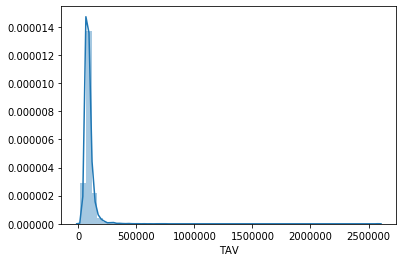

In [14]:
sns.distplot(myN00['TAV'])

$z$ - score $ = \frac{x-\mu}{\sigma}$

In [37]:
#mean
myNmean = myN['TAV'].mean()

# standard deviation
myNsd = myN['TAV'].std()

myN00['Z-Score'] = (myN00['TAV']-myNmean)/myNsd

myN00.to_pickle('myN00.pkl')
myN00.head()
#myNmean
#myNsd

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,PARCEL,YEAR,Area,Neighborhood,TAV,Sale Price,Z-Score
4,R0027000008,2000,BOISE BENCH,CENTRAL BOISE BENCH,129100.0,NaN,-0.180250
5,R0027000013,2000,BOISE BENCH,CENTRAL BOISE BENCH,85200.0,45000.0,-0.643047
6,R0027000018,2000,BOISE BENCH,CENTRAL BOISE BENCH,106700.0,79800.0,-0.416392
7,R0027000025,2000,BOISE BENCH,CENTRAL BOISE BENCH,46400.0,36000.0,-1.052079
8,R0027000030,2000,BOISE BENCH,CENTRAL BOISE BENCH,59600.0,57500.0,-0.912924


In [22]:
myN00['Z-Score'].min()
myN00['Z-Score'].min()
#sns.distplot(myN00['Z-Score'])

-1.414726328593882

# Make df for all neighborhoods over each year

In [ ]:
# make list of neighborhoods

# make list of years

In [ ]:
# make a fn to make a vector for average house $ for a neighborhood for each year





In [ ]:
# make a df where each column is one of the vectors made from the fn




In [53]:
myN00 = pd.read_pickle('myN00.pkl')

myN00F = myN00.loc[(myN00['Z-Score'] <= 3) & (myN00['Z-Score'] >= -3) ]
#myN00 = myN00.drop(myN00[myN00['Z-Score'] <= 3].index, inplace = True)
#myN00['Z-Score'].max()
myN00F.head()

,PARCEL,YEAR,Area,Neighborhood,TAV,Sale Price,Z-Score
4,R0027000008,2000,BOISE BENCH,CENTRAL BOISE BENCH,129100.0,NaN,-0.180250
5,R0027000013,2000,BOISE BENCH,CENTRAL BOISE BENCH,85200.0,45000.0,-0.643047
6,R0027000018,2000,BOISE BENCH,CENTRAL BOISE BENCH,106700.0,79800.0,-0.416392
7,R0027000025,2000,BOISE BENCH,CENTRAL BOISE BENCH,46400.0,36000.0,-1.052079
8,R0027000030,2000,BOISE BENCH,CENTRAL BOISE BENCH,59600.0,57500.0,-0.912924


In [51]:
myN00['Z-Score'].max()

2.974993116442773

In [64]:
myN00.shape

(7691, 7)

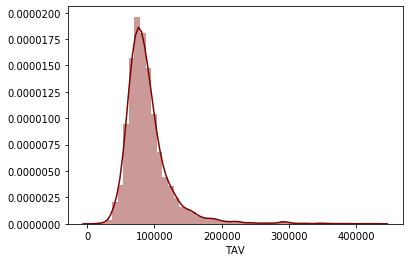

In [70]:
sns.distplot(myN00F['TAV'], color = "maroon")

## Figure out IQR
$$IQR = Q3-Q1$$
Outliers:
    $$<(Q1 - 1.5 * IQR)$$
    $$>(Q3 + 1.5 * IQR)$$

In [65]:
myN00q1 = myN00['TAV'].quantile(0.25)
myN00q3 = myN00['TAV'].quantile(0.75)
myN00iqr = myN00q3 - myN00q1
iqrMax = myN00q3 + (1.5*myN00iqr)
iqrMin = myN00q1 - (1.5*myN00iqr)
myN00iqr

30600.0

In [68]:
myN00 = pd.read_pickle('myN00.pkl')
myN00i = myN00[(myN00['TAV']<iqrMax) & (myN00['TAV'] > iqrMin)]
myN00i['TAV'].max()

146100.0

In [61]:
print(myN00F['TAV'].max())
print(myN00q3+(1.5*myN00iqr))

428400.0
146200.0


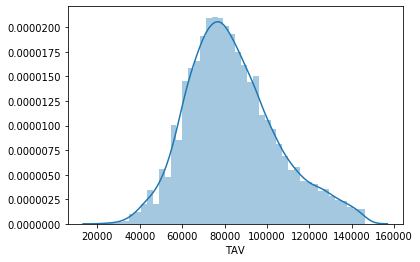

In [72]:
sns.distplot(myN00i['TAV'])
#sns.distplot(myN00F['TAV'], color = "maroon")

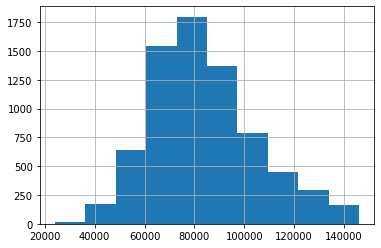

In [75]:
myN00i['TAV'].hist()

In [81]:
#df_year_base

import plotly
import plotly.express as px

fig1 = px.line(df_year_base, x='Year', y = 'TotalHouse')
fig2 = px.line(df_year_base, x='Year', y = 'TotalPop')
fig2.show()

In [76]:
df_year_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
Year          19 non-null category
TotalHouse    19 non-null int64
TotalPop      19 non-null int64
dtypes: category(1), int64(2)
memory usage: 555.0 bytes


# Graph Stuff

In [ ]:
import plotly
import plotly.express as px

fig1 = px.box(mySec, x='YEAR', y = 'TAV')
fig1.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data =go.Scatter(
        x = mySec['YEAR'],
        y = mySec['TAV']))

fig.show()

### Look into z-scores for trimming the outliers
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba